# ✏️ Introduction 

With the Home Sales dataset in King County, USA, we will create models and evaluate these models using regression algorithms in machine learning to predict home sales prices. 

1. [Load and Check Data](#1)
1. [Regression](#2)
    * [Linear Regression](#3)
    * [Multiple Linear Regression](#4)
    * [Polynomial Linear Regression](#5)
    * [Decision Tree Regression](#6)
    * [Random Forest Regression](#7)
   
  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id='1'></a><br>
# Load and Check Data

In [ ]:
house_data = pd.read_csv("/kaggle/input/housesalesprediction/kc_house_data.csv")

In [ ]:
house_data.head()

In [ ]:
#dropping the id and date column
house_data = house_data.drop(['id','date'], axis = 1)

In [ ]:
house_data.head()

In [ ]:
house_data.shape

In [ ]:
house_data.info()

In [ ]:
house_data.isnull().any()

* No nan value as we would like.

In [ ]:
house_data.describe().T

In [ ]:
data = house_data.copy()

In [ ]:
data.corr()["price"].sort_values()

* sqft_living and grade have the highest correlation with price.

In [ ]:
import plotly.express as px
fig = px.histogram(data, x="price",
                   marginal="box"
                  )
fig.show()

* We see that the price has very outliers, but this may be normal for house prices.

In [ ]:
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), cmap="Blues", annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

### Let's learn more about data with visualization.

In [ ]:
h = data.hist(bins=30,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)


In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(x="floors", y="price",data=data, palette = 'magma', inner="points")
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(x="waterfront", y="price",data=data, palette = 'magma', inner="points")
plt.show()

In [ ]:
f, ax = plt.subplots(1, 1,figsize=(12.18,5))
sns.boxplot(x=data['grade'],y=data['price'], ax=ax)
ax.yaxis.tick_left()
ax.set(xlabel='Grade', ylabel='Price');

* The price increases in proportion to the grade.

In [ ]:
trace1 = go.Scatter3d(
    x=data.bathrooms,
    y=data.bedrooms,
    z=data.sqft_living,
    mode='markers',
    marker=dict(
        size=8,
        color='#b167b7',        
    )
)

data_ = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data_, layout=layout)
iplot(fig)

* From here, we can see that the price increases as the number of bedrooms and bathrooms increases.

<a id='2'></a><br>
# Regression

Regression is a set of statistical methods used for the estimation of relationships between a dependent variable and one or more independent variables. It can be utilized to assess the strength of the relationship between variables and for modeling the future relationship between them.

<a id='3'></a><br>
## Linear Regression

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.

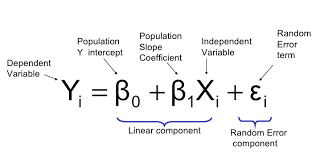

In [ ]:
data.head()

In [ ]:
x = data.loc[:,"sqft_living"].values.reshape(-1,1)
y = data.loc[:,"price"].values.reshape(-1,1)

plt.scatter(x=x,y=y,c="#7aa4f5", alpha=0.4)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Fit
reg.fit(x_train, y_train)

# Predict
predicted = reg.predict(x_test)

# R^2 
print('R^2 score: ',reg.score(x_test, y_test))
# Plot regression line and scatter
plt.plot(x_test, predicted, color='#010149', linewidth=3)
plt.scatter(x=x,y=y,c="#7aa4f5", alpha=0.4)
plt.xlabel('Sq. Ft. Living')
plt.ylabel('Price')
plt.show()

* With the linear regression model created by sqft_living, which has the highest correlation with price, R^2 score of 0.48 was obtained.

<a id='4'></a><br>
## Multiple Linear Regression 

Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data.


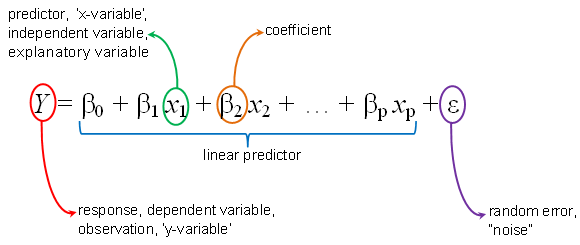

### Model 1

In [ ]:
x = data.loc[:,["sqft_living","grade","sqft_above","sqft_living15","bathrooms","view"]].values
y = data.loc[:,"price"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

* Model 1 includes only highly correlated variables.

In [ ]:
multiple_linear_reg = LinearRegression()

# Fit
multiple_linear_reg.fit(x_train,y_train)

# Predicted
predicted = multiple_linear_reg.predict(x_test)

# R^2 
print('R^2 score: ',multiple_linear_reg.score(x_test, y_test))

* Although it is a better result than simple linear regression, it is not sufficient.

### Model 2

In [ ]:
x = data.drop(['price'], axis = 1)
y = data.loc[:,"price"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

* Model 2 includes all variables.

In [ ]:
multiple_linear_reg = LinearRegression()

# Fit
multiple_linear_reg.fit(x_train,y_train)

# Predicted
predicted = multiple_linear_reg.predict(x_test)

# R^2 
print('R^2 score: ',multiple_linear_reg.score(x_test, y_test))

* Model 2 is more successful than model 1.

<a id='5'></a><br>
## Polynomial Regression

Sometimes, a plot of the residuals versus a predictor may suggest there is a nonlinear relationship. One way to try to account for such a relationship is through a polynomial regression model. 

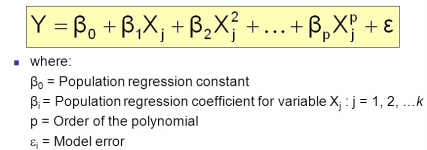

In [ ]:
x = data.drop(['price'], axis = 1)
y = data.loc[:,"price"].values.reshape(-1,1)

from sklearn.preprocessing import PolynomialFeatures
polynomial_reg = PolynomialFeatures(degree = 2)

x_polynomial = polynomial_reg.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_polynomial, y, test_size = 0.33, random_state = 42)

In [ ]:
polynomial_linear_reg = LinearRegression()

# Fit
polynomial_linear_reg.fit(x_train,y_train)

# Predicted
predicted = polynomial_linear_reg.predict(x_test)

# R^2 
print('R^2 score: ',polynomial_linear_reg.score(x_test, y_test))

* A high result has been achieved with this model.

<a id='6'></a><br>
## Decision Tree 

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. 

In [ ]:
x = data.loc[:,"grade"].values.reshape(-1,1)
y = data.loc[:,"price"].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

# Fit
tree_reg.fit(x_train,y_train)

# Predict

predicted = tree_reg.predict(x_test)

# R^2 
print('R^2 score: ',tree_reg.score(x_test, y_test))

* With this model, the highest result was obtained with the grade variable.

<a id='7'></a><br>
## Random Forest

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [ ]:
x = data.drop(['price'], axis = 1)
y = data.loc[:,"price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

r_forest = RandomForestRegressor(n_estimators = 100, random_state = 42)
r_forest.fit(x_train,y_train)

train_predicted = r_forest.predict(x_train)
test_predicted = r_forest.predict(x_test)


from sklearn.metrics import r2_score


print('R^2 train data: %.3f, R^2 test data: %.3f' % (r2_score(y_train,train_predicted),r2_score(y_test,test_predicted)))

* The highest success rate has been achieved.

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(train_predicted,train_predicted - y_train,
          c = '#b868e7', marker = '*', s = 100, alpha = 0.7,
          label = 'Train data')
plt.scatter(test_predicted,test_predicted - y_test,
          c = '#95c0ed', marker = '*', s = 100, alpha = 0.6,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Result')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 7000000, lw = 2, color = '#2f0254')
plt.show()